# Election with Platform and Valence Competition
## Scott Ashworth and Ethan Bueno de Mesquita

Presented by Gento Kato (POL282 2018/01/23)


## 1. Overview

* **Problem**: Interaction between policy platform and valence (e.g., campaign spending) in election.
  1. Exogenous (fixed) valence advantage and platform determination.
  2. **Endogenous determination of both platform and valence**. 

* **Insights**: 
  1. **Policy polarization loosen the needs to accumulate valence**. Policy divergence even without policy preference.
  2. **Uncertainty about the median voter's ideal point** (not about candidates) is important.
  3. Exogenous increase in the marginal **benefit-to-cost ratio of valence accumulation** increases both policy polarization and valene accumulation.

* **Importance**: Capturing important elements in the election. Polarization without policy preference is particularly interesting.

* **The model useful?** Some details are difficult to follow, but intuition is simple.  The graphs especially help the straightforward understanding. On the other hand, it is diffucult to comprehend how the non-smooth change in the strategy is realized in the actual election. 



## 2. Game Setting

* Players: **the voter** as a group and **two candidates** $c \in \{L, R\}$

* Voter's policy **ideal point**: $x^\star \in \mathbb{R}$ <br> 
*Common belief*: distributed uniformly on $\left[-\cfrac{\gamma}{2}, \cfrac{\gamma}{2}\right]$ 

* Candidate's **policy platform**: $x \in \mathbb{R}$ where $x_L \leq x_R$

* Candidate's **valence**: $v \in \mathbb{R}_+$

* Sequential Game, Subgame Perfect Equiribria (SPE)

* Timing
  1. The candidates simultaneously choose $x_c$ (platforms)
  2. The candidates observe $x_c$, and simultaneously choose $v_c$ (valence subgame)
  3. Nature determines ideal point $x^\star$ of the voter.
  4. The voter observes $x_c$, $v_c$ and $x^\star$ and chooses $L$ or $R$ (voting subgame)


* Utility:
  * For voter: $u(x, v) = v - (x^\star - x)^2$ <br>
    (*Implies sincere voting*)
  * For candidate: $u_c = B \lambda_c - v_c$ <br>
    (*$B$ relates to the benefit-to-cost ratio of valence accumulation*) <br>
    (*$\lambda_c$ indicates the probability of $c$ winning the election*)


* Strategy Sets
  * Voter's strategy: $c \in \{L, R\}$
  * Candidate's Strategy: $\{x_c, \sigma_c^{x_L,x_R} \}$ <br>
  ($\sigma_c^{x_L,x_R}$ is a mapping prob. function of $v_c$ given fixed values of $x_L$ and $x_R$)

* Interested in Symmetric SPE: $x_L = -x_R$  

## 3.1. Solve Voting Subgame


* Vote for L if: $$v_L - (x^\star - x_L)^2 > v_R - (x^\star - x_R)^2$$ <br>
* Find the cutoff $\hat{x}$ of which voter is indifferent between $L$ & $R$:

\begin{align*}
v_L - (\hat{x} - x_L)^2 &= v_R - (\hat{x} - x_R)^2 \\
v_L - v_R  &= (\hat{x} - x_L)^2 - (\hat{x} - x_R)^2 \\
&= \hat{x}^2 - 2 x_L \hat{x} + x_L^2 - \hat{x}^2 + 2 x_R \hat{x} - x_R^2 \\
x_R^2 - x_L^2 + v_L - v_R &= 2 (x_R - x_L) \hat{x} \\
2 (x_R - x_L) \hat{x} &= (x_R + x_L)(x_R - x_L) + v_L - v_R \\
\hat{x} &= \cfrac{1}{2}(x_R + x_L) + \cfrac{v_L - v_R}{2 (x_R - x_L)}
\end{align*}

* Probability of $L$ winning the election

\begin{equation*}
  \lambda(x_L,x_R,v_L,v_R) = \begin{cases}
    \frac{1}{2}  & \text{if $x_L = x_R$ and $v_L = v_R$}.\\
    1  & \text{if $x_L = x_R$ and $v_L > v_R$}.\\
    0  & \text{if $x_L = x_R$ and $v_L < v_R$}.\\
    F_\gamma(\hat{x}(x_L,x_R,v_L,v_R)) & \text{if $x_L \neq x_R$}.
  \end{cases}
\end{equation*}

* where $F_\gamma(x)$ is a CDF of uniform distribution:

\begin{equation*}
  F_\gamma(x) = \begin{cases}
    1  & \text{if $x > \gamma/2$}.\\
    \cfrac{x - (- \gamma/2)}{\gamma/2 - (-\gamma/2)} = \cfrac{x + \gamma/2}{\gamma} & \text{if $x \in [-\gamma/2, \gamma/2]$}.\\
    0  & \text{if $x < - \gamma/2$}.
  \end{cases}
\end{equation*}

* if $x_L \neq x_R$ and $\hat{x} \in [-\gamma/2, \gamma/2]$, plug $\hat{x}$ into $F_\gamma(x)$:

\begin{align*}
\lambda(x_L,x_R,v_L,v_R) &= F_\gamma(\hat{x}(x_L,x_R,v_L,v_R)) \\
&=  \cfrac{\hat{x} + \gamma/2}{\gamma} \\
&=  \cfrac{ \cfrac{1}{2}(x_R + x_L) + \cfrac{v_L - v_R}{2 (x_R - x_L)} }{\gamma} + \frac{1}{2} \\
&=  \frac{1}{2} + \cfrac{1}{2\gamma}(x_R + x_L) + \cfrac{v_L - v_R}{2\gamma (x_R - x_L)} 
\end{align*}


In [2]:
library(ggplot2)
source("../../../Method_Notes/sources/gktheme.R")
#source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")

## Utility Functions
ucalc <- function(xL,xR="sym",vL=1,vR=2, g=1, B = 8, out="xhat"){
    # If xR is defined as symmetric 
    if(xR[1]=="sym") { xR <- -xL }
    # xhat calculation
    xhat <- (xR + xL)/2 + (vL - vR)/(2*(xR - xL))
    # probability of L winning election
    lL <- 1/2 + (xR + xL)/(2*g) + (vL - vR)/(2*g*(xR - xL))
    lL[which(xhat > g/2)] <- 1
    lL[which(xhat < -(g/2))] <- 0
    lL[which(xL==xR & vL==vR)] <- 0.5
    lL[which(xL==xR & vL>vR)] <- 1
    lL[which(xL==xR & vL<vR)] <- 0
    # Benefit Only
    BlL <- B * lL
    # utility for L
    uL <- BlL - vL
    # EQ payoff
    Tx <- ceiling((B/(2*g*(xR-xL)))) - 1
    piL <- B * (0.5 + ((xR+xL)/(2*g))) * (1-((2*g*(xR-xL))/B) * Tx)
    piR <- B * (0.5 - ((xR+xL)/(2*g))) * (1-((2*g*(xR-xL))/B) * Tx)
    # Valence Total
    vLR <- 2*g*(xR-xL) * Tx
    # Return what is defined in out
    ulist <- list("xhat" = xhat, "lL" = lL, "BlL" = BlL, "uL" = uL,
                  "piL" = piL, piR = "piR", "vLR" = vLR) 
    return(ulist[[out]])
} 

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

In [3]:
## Cutoff Simulation
usim <- function(xL, xR="sym", vLmin, vLmax, vR=0, 
                    g=1, B=8, out="xhat", n=500){
    # Symmetric xR
    if(xR=="sym") {
        xR <- -xL
    } else { 
        xR <- rep(xR,length(xL))
    }
    d <- data.frame(xL=numeric(), xR=numeric(),
                    vL=numeric(), vR=numeric(), xhat=numeric())
    for (i in 1:length(xL)) {
    xLi <- rep(xL[i], n); xRi <- rep(xR[i], n)
    vLi <- seq(vLmin,vLmax, length=n); vRi <- rep(vR, n)
    
    outval <- ucalc(xL=xLi, xR=xRi, vL=vLi, vR=vRi, g=g, B=B, out=out)
    
    di <- data.frame(xL=xLi, xR=xRi, vL=vLi, vR=vRi, out=outval)
    d <- rbind(d, di)
    }

    return(d)
    
}

In [4]:
## Cutoff Plot
uplot <- function(xL, xR="sym", vLmin, vLmax, vR=0, 
                     g=1, B=8, out="xhat", n=500, ylim=NULL){
  collist <- c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f")
  ud <- usim(xL=xL, vLmin=vLmin, vLmax=vLmax, xR=xR, vR=vR, 
                g=g, B=B, out=out, n=n)
  ud$xdist <- as.character(abs(ud$xL-ud$xR))
  ycenter <- (max(ud$out)-min(ud$out))/2
  xcenter <- (vLmax-vLmin)/2
  p <- ggplot(ud, aes(x=vL)) + gktheme 
  if (out=="xhat") { 
    if (length(unique(ud$xL))==1) {
       p <- p + annotate("rect", 
                         xmin=ud$vL[which(ud$out > -(g/2))][1], 
                         xmax=ud$vL[which(ud$out >= g/2)][1], 
                         ymin=-Inf, ymax=Inf,
                         fill="#a6d854", alpha=0.2, colour=NA)+
      annotate("text", y = (ycenter-min(ud$out))/2 + min(ud$out), 
               x = ud$vL[which(ud$out >= g/2)][1], 
               label = "I(vR, xL, xR)", colour="#66a61e")   
    }
    p <- p + 
      geom_ribbon(aes(ymin=-g/2, ymax=g/2), fill="#ffd92f", alpha=0.2, colour=NA) +
      annotate("text", y = -g/2, x = xcenter, label = "-- -g/2 --") + 
      annotate("text", y = g/2, x = xcenter, label = "-- g/2 --")
   } else if (out=="lL"){
    if (length(unique(ud$xL))==1) {
      p <- p + annotate("rect", 
                         xmin=ud$vL[which(ud$out > 0)][1], 
                         xmax=ud$vL[which(ud$out >= 1)][1], 
                         ymin=-Inf, ymax=Inf,
                         fill="#a6d854", alpha=0.2, colour=NA)+
      annotate("text", y = (ycenter-min(ud$out))/2 + min(ud$out), 
               x = ud$vL[which(ud$out >= 1)][1], 
               label = "I(vR, xL, xR)", colour="#66a61e")
    }
  } else if (out=="BlL") {
    if (length(unique(ud$xL))==1) {
      p <- p + annotate("rect", 
                         xmin=ud$vL[which(ud$out > 0)][1], 
                         xmax=ud$vL[which(ud$out >= B)][1], 
                         ymin=-Inf, ymax=Inf,
                         fill="#a6d854", alpha=0.2, colour=NA) +
      annotate("text", y = (ycenter-min(ud$out))/2 + min(ud$out), 
               x = ud$vL[which(ud$out >= B)][1], 
               label = "I(vR, xL, xR)", colour="#66a61e")
    }
    p <- p + geom_line(aes(y=vL),colour="red",linetype=1,size=0.5) + 
      geom_vline(aes(xintercept=B[1]),colour="blue",linetype=2,size=0.5) + 
      annotate("text", x = B[1], y = ycenter, label = "vL=B", colour="blue") +
      geom_hline(aes(yintercept=B[1]),colour="blue",linetype=2,size=0.5) + 
      annotate("text", x = xcenter, y = B[1], label = "BlL=B", colour="blue")
  } else if (out=="uL") {
    if (length(unique(ud$xL))==1) {
      p <- p + annotate("rect", 
                         xmin=ud$vL[which(ud$out+ud$vL > 0)][1], 
                         xmax=ud$vL[which(ud$out+ud$vL >= B)][1], 
                         ymin=-Inf, ymax=Inf,
                         fill="#a6d854", alpha=0.2, colour=NA) +
      annotate("text", y = (ycenter-min(ud$out))/2 + min(ud$out), 
               x = ud$vL[which(ud$out+ud$vL >= B)][1], 
               label = "I(vR, xL, xR)", colour="#66a61e")
    }
   p <- p + geom_hline(aes(yintercept=0),colour="black",size=0.5,linetype=2) 
  }
  p <- p + geom_line(aes(y=out, 
                  colour=factor(xdist,levels=unique(xdist)),
                  linetype=factor(xdist,levels=unique(xdist))), size = 1) + 
    scale_colour_manual(name="Platform Distance",values=collist[1:length(xL)]) + 
    scale_linetype_manual(name="Platform Distance",values=c(1:length(xL))) + 
    theme(legend.position = c(0.15,0.8))
              
  if (is.null(ylim)==FALSE){
    p <-p + scale_y_continuous(limits=ylim)
  }
  
  # Title Automation
  t1 <- "L's Valence Impact on"
  vLt <- paste("\nvL=",vLmin,":",vLmax,sep="")
  vRt <- paste("vR=", vR, sep="")
  gt <- paste("gamma=", g, sep="")
  Bt <- paste("B=", B, sep="")   
  if (out == "xhat") { txt <- paste(t1,out,vLt,vRt,gt)}
  if (out == "lL") { txt <- paste(t1,out,vLt,vRt,gt) }
  if (out == "BlL") { txt <- paste(t1,out,vLt,vRt,gt,Bt)}
  if (out == "uL") { txt <- paste(t1,out,vLt,vRt,gt,Bt)}
  p <- p + ggtitle(txt) + ylab(out)  
               
  return(p)
}

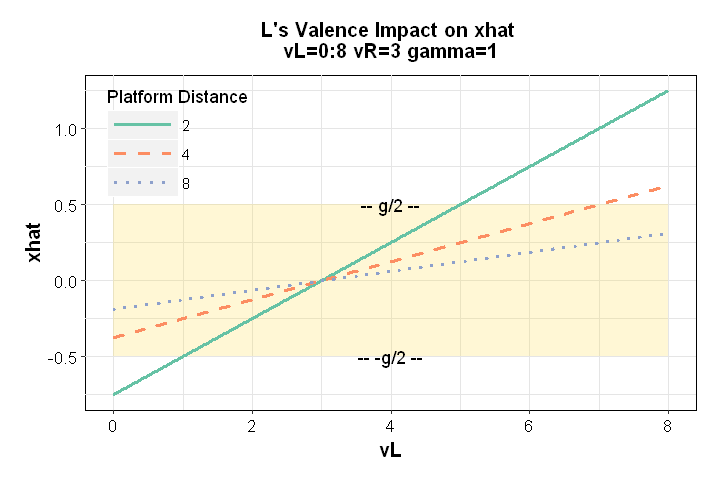

In [5]:
uplot(xL=c(-1,-2,-4), xR="sym", vLmin=0, vLmax=8, vR=3, g=1, out="xhat") # Try "lL"

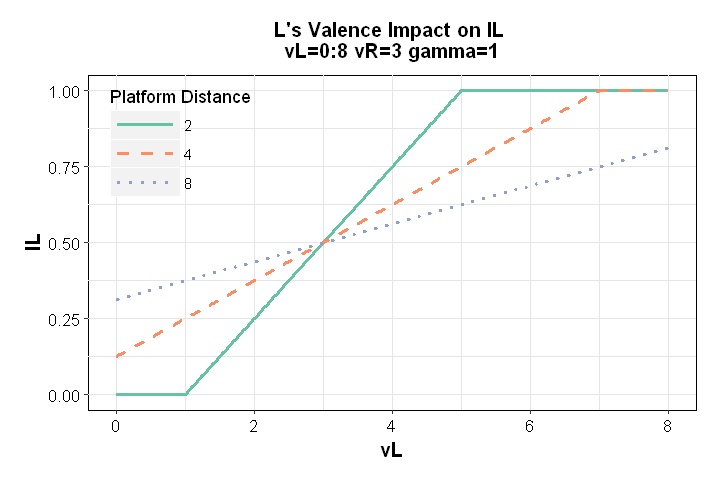

In [6]:
uplot(xL=c(-1,-2,-4), xR="sym", vLmin=0, vLmax=8, vR=3, g=1, out="lL") # Try "lL"

## 3.2. Solve Valence Subgame

* Nash Equilibrium of the subgame can be denoted as $\{\sigma_L^{x_L,x_R}, \sigma_R^{x_L,x_R}\}$, which are the mapping probability distribution of $v_c$ which maximize $u_L$ and $u_R$ with respect to $v_{-c}$ given possible combinations of $\{x_L,x_R\}$.

* In terms of valence, $L$ wins the election if: 

\begin{align*}
v_L - (x^\star - x_L)^2 &> v_R - (x^\star - x_R)^2 \\
v_L &> (x^\star - x_L)^2 - (x^\star - x_R)^2 + v_R \\
 &> \{(x^\star - x_L) + (x^\star - x_R)\}\{(x^\star - x_L) - (x^\star - x_R)\} + v_R \\
 &> \{2x^\star - x_L - x_R\}\{ - x_L + x_R\} + v_R \\
 &> - 2x^\star x_L + 2x^\star x_R  + x_L^2 - x_L x_R + x_L x_R - x_R^2 + v_R \\
 &> - 2x^\star x_L + 2x^\star x_R  + x_L^2 - x_R^2 + v_R \\
 &> 2(x_R - x_L)x^\star + x_L^2 - x_R^2 + v_R \equiv \mathcal{H} \\
\end{align*}

* $\mathcal{H}$ is stochastic and has **variance**, because $x^\star$ (and often $v_R$) are stochastic. Marginal benefit of valence is decreasing in the variance of $\mathcal{H}$. The variance of $\mathcal{H}$ is increasing in the variance of $2(x_R - x_L)x^\star$, which is increasing in $x_R - x_L$ (policy polarization), which is decreasing in the marginal benefit of valence.



### Equilibrium 1 (when $x_L=x_R$: platform convergence) 



\begin{equation*}
NE_{conv} = \{\mbox{Both play $\sigma_c^{x_L,x_R} =$ uniform distribution on $[0, B]$}\}
\end{equation*}
  
\begin{equation*}
 {u_c}_{{NE}_{conv}} = B \cdot p_c - v_c \\
 E(u_c)_{{NE}_{conv}} = B \cdot \frac{1}{2} - \overline{\mbox{unif}(0,B)}\\
 = \frac{B}{2} - \frac{B}{2} = 0
\end{equation*}
 
  * Proof: 
    1. Any pure strategy $v_c \geq B$ is strictly dominated by $v_c=0$. <br>
       (i.e., $Bp_L - v_c < 0$ for all $v_c > B$ and $B/2 - v_c < 0$ for $v_c = B$)
    2. For any pure strategy $v_c \in [0,B)$, one player has an incentive to deviate and increase $v_c$ slightly.
    4. Only mixed strategy is possible. Give equal probability to all not strictly dominated options.

### Equilibrium 2 (when $2\gamma(x_R-x_L) \geq B$: high platform divergence)

 $$NE_{high} = \{v_L = v_R = 0\}$$
 
\begin{align*}
 {u_c}_{{NE}_{high}} &= B \cdot \lambda_c - v_c \\
 E(u_c)_{{NE}_{high}} &= B \left[ \frac{1}{2} + \cfrac{1}{2\gamma}(x_R + x_L) + \cfrac{v_L - v_R}{2\gamma (x_R - x_L)} \right] - 0\\
 &= B \left[ \frac{1}{2} + \cfrac{x_R + x_L}{2\gamma}  \right]
\end{align*}


 * Proof: 
   Given fixed $\gamma$, $x_L$, $x_R$ and $v_R$  (assume that $\hat{x} \in [-\gamma/2,\gamma/2]$), 
   
\begin{align*}
  \lambda &= B \left[ \frac{1}{2} + \cfrac{1}{2\gamma}(x_R + x_L) + \cfrac{v_L - v_R}{2\gamma (x_R - x_L)} \right] - v_L \\
  &= \cfrac{B}{2\gamma (x_R - x_L)}v_L - v_L + Z \\
  &= \left( \cfrac{B}{2\gamma (x_R - x_L)} - 1 \right)v_L + Z \tag{v.1}  
\end{align*}

  $\lambda$ is strictly decreasing with respect to $v_L$ if $2\gamma(x_R-x_L) > B$, therefore $v_L=0$ is the unique best response. When $2\gamma(x_R-x_L) = B$, $v_L$ does not have influence on $p_L$ , thus $v_L=0$ is one of the best response. The symmetric logic follows for $x_R$. 

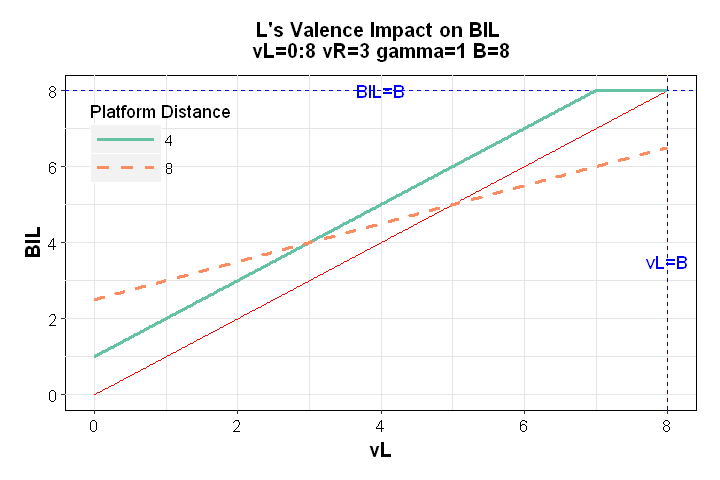

In [7]:
uplot(xL=c(-2,-4), xR="sym", vLmin=0, vLmax=8, vR=3, g=1, B=8, out="BlL") # try"uL"

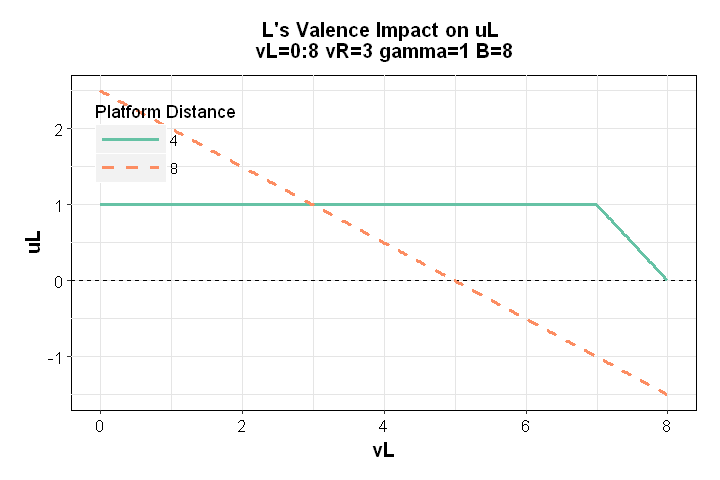

In [8]:
uplot(xL=c(-2,-4), xR="sym", vLmin=0, vLmax=8, vR=3, g=1, B=8, out="uL") # try"uL"

### Equilibrium 3 (when $2\gamma(x_R- x_L) < B$ and $x_R \neq x_L$: Moderate Platform Divergence)

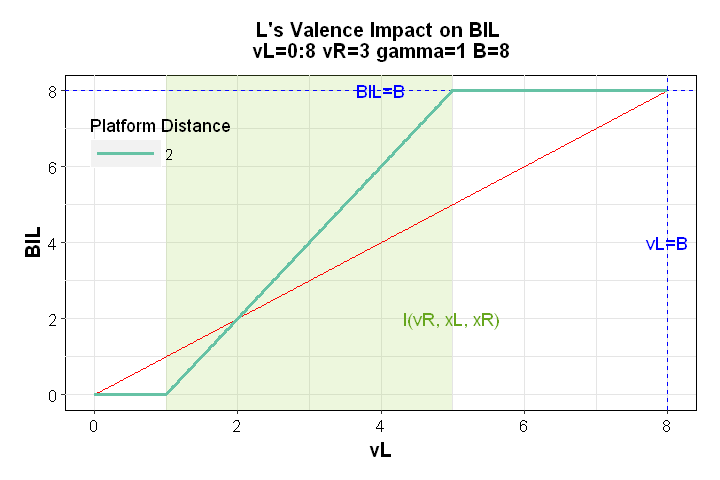

In [9]:
uplot(xL=-1, xR="sym", vLmin=0, vLmax=8, vR=3, g=1, B=8, out="BlL") # try"uL"

* No Pure Strategy Equilibria

* There is a mixed-strategy EQ where supports $v_c \in I(v_{-c}, x_L, x_R)$ for both players. 
   * Players play different action in different subgame (non-overlapping) 
   * $\alpha \equiv 2\gamma (x_R - x_L)$
   * The platform is moderately diverged if $0 < \alpha < B \equiv \cfrac{B}{\alpha}>1$.
   * $T(x)$: the integer greater or equal to $x$ - 1. (If $x = 10.89$, then$T(x)=10$).
   * $n$: $T\left(\cfrac{B}{\alpha}\right)$


* Then the EQ $(\sigma_L, \sigma_R)$ is characterized as:
   
   \begin{equation*}
   (p_c^1, p_c^2, ..., p_c^n) = \left(1- n \cdot \cfrac{\alpha}{B},\cfrac{\alpha}{B}, ..., \cfrac{\alpha}{B}\right) \\
    \mbox{assigned to:} \{v_c^1 = 0, v_c^2, ..., v_c^n\}
   \end{equation*}

Where:
 * $\beta^k$: The probability that L wins with $(v_L^k, v_R^k)$
    1. $v_L^2 = Bp_L^1\beta^1 + \alpha(1-\beta^1)$
    2. $v_R^2 = Bp_R^1(1-\beta^1) + \alpha\beta^1$ 
    3. For $k>1$, 
       * $v_L^{k+1} = \alpha + \alpha(\beta^{k+1} - \beta^k) - v_L^k$
       * $v_R^{k+1} = \alpha - \alpha(\beta^{k+1} - \beta^k) - v_R^k$
       * $v_L^{k+1} + v_L^{k+1} = \alpha - (v_L^k +v_R^k)$ 
          
 * The set of $p^k_c$ is unique, but $v_c^k$ for $k > 2$ are not. 

 * Proposition 1 (Latter Part): The strictly positive payoff from non-overlapping mixed strategy EQ are:
 
 $$\pi_L(x_L, x_R) = B\left( \cfrac{1}{2} + \cfrac{x_R + x_L}{2\gamma} \right) \left(1- \cfrac{2\gamma(x_R-x_L)}{B} T\left(\cfrac{B}{2\gamma(x_R-x_L)} \right) \right)$$
 
 $$\pi_R(x_L, x_R) = B\left( \cfrac{1}{2} - \cfrac{x_R + x_L}{2\gamma} \right) \left(1- \cfrac{2\gamma(x_R-x_L)}{B} T\left(\cfrac{B}{2\gamma(x_R-x_L)} \right) \right)$$
 
   1. $B$: The payoff of victory given no valence accumulated
   2. The probability that $c$ is winning if no valence accumulated.
   3. The probability that either party chooses zero valence.
   

In [10]:
## Payoff Simulation
usim2 <- function(xLmin, xLmax, xR="sym", g=1, B=8, out="piL", n=500){
    # Symmetric xR
    xL <- seq(xLmin,xLmax, length=n)
    if(xR=="sym"){
      xR <- -xL
    } else { 
        xR <- rep(xR,n)
    }
    outval = ucalc(xL=xL,xR=xR, g=g, B=B, out=out)
    
    d <- data.frame(out=outval, xL=xL, xR= xR, g=g, B=B)
 
    return(d)   
}

In [11]:
uplot2 <- function(xLmin, xLmax, xR="sym", g=1, B=8, out="piL", n=500, ylim=NULL){
  collist <- c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f")
  ud <- usim2(xLmin=xLmin, xLmax=xLmax, xR=xR, g=g, B=B, out=out, n=n)
  ud$f <- (0.5 + (ud$xR+ud$xL)/(2*ud$g)) * (2*ud$g*(ud$xR-ud$xL))
  p <- ggplot(ud, aes(x=xL)) + gktheme 
  p <- p + geom_line(aes(y=out), size = 1)
  if (out=="piL") {
      p <- p + geom_line(aes(y=f), size=0.5, colour="red")
  }
  if (is.null(ylim)==FALSE){
    p <-p + scale_y_continuous(limits=ylim)
  }
  
  # Title Automation
  t1 <- "L's Platform Impact on"
  xLt <- paste("\nxL=",min(ud$xL),":",max(ud$xL),sep="")  
  xRt <- paste("xR=",min(ud$xR),":",max(ud$xR),sep="")  
  gt <- paste("gamma=", g, sep="")
  Bt <- paste("B=", B, sep="")   
  txt <- paste(t1,out,xLt,xRt,gt,Bt)
  p <- p + ggtitle(txt) + ylab(out)  
               
  return(p)
}

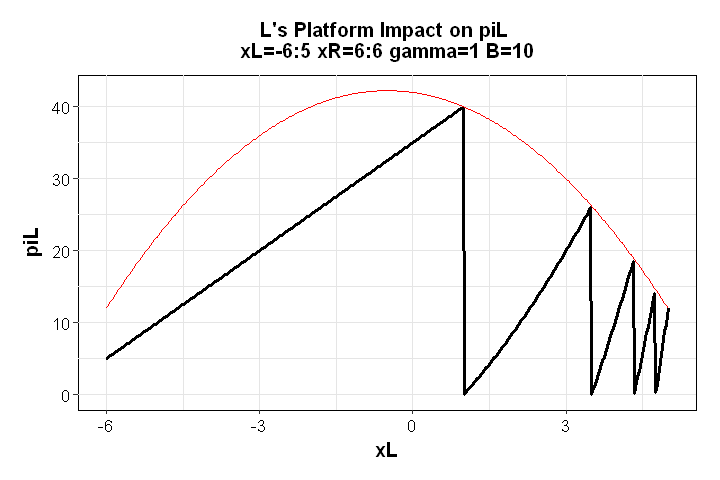

In [12]:
uplot2(xLmin = -6, xLmax = 5, xR=6, g=1, B=10, out="piL") #change g

* Proposition 2: Expected sum of valences in the EQ is unique to $(x_L, x_R)$:

$$E[v_L+v_R | x_R, x_L, \gamma, B] = 2\gamma(x_R-x_L) \cdot T\left(\cfrac{B}{2\gamma(x_R-x_L)}\right)$$ 

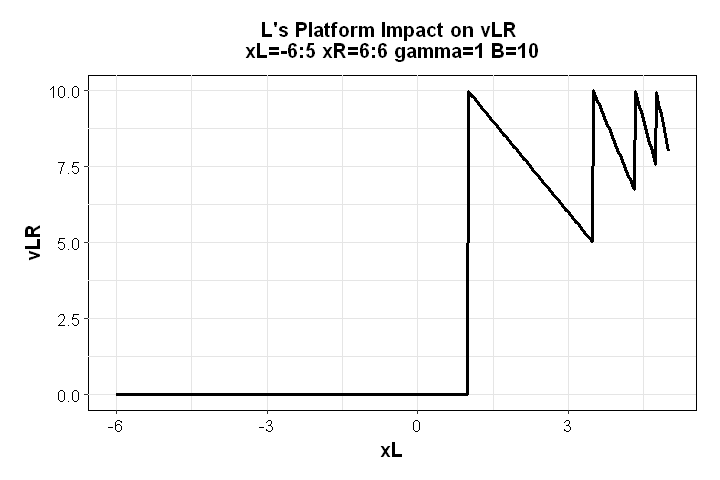

In [13]:
uplot2(xLmin = -6, xLmax = 5, xR=6, g=1, B=10, out="vLR") # change g

## 3.3. Solve Platform Game

* Proposition 3: There is no SPE with $x_L=x_R$
  * because $\pi_c(x_L, x_R)$ are strictly positive.
  
* Proposition 4: Non-overlapping SPE with moderately diverged platforms exists if $B \geq 2\gamma$, and all SPEs have moderately diverged platforms if $B > 4\gamma$.

* In the EQ, the equilibrium platforms are: 
$$x^\star_L = -\cfrac{B}{4n\gamma} \mbox{ and } x^\star_R = \cfrac{B}{4n\gamma}$$
$$\mbox{ where $n$ is the integer $\in \left[\cfrac{B}{2\gamma^2}-1, \cfrac{B}{2\gamma^2}+1\right]$}$$ 
 

## 4. Comparative Statics

In [14]:
usim3 <- function(Bmin, Bmax, xL=NULL, xR="sym", g=1, out="vLR", n=500){
    # Symmetric xR
    B <- seq(Bmin,Bmax, length=n)
        nval <- ceiling(0.5*(B/g^2))
    if (is.null(xL)==TRUE) {
        xL <- -(B/(4*nval*g)) 
        xR <- -xL        
    } else if (xR=="sym") { 
        xR <- -xL        
    }
    outval = ucalc(xL=xL, xR=xR, g=g, B=B, out=out)
    
    d <- data.frame(out=outval, xL=xL, xR= xR, g=g, B=B, n=nval)
 
    return(d)   
}

In [15]:
uplot3 <- function(Bmin, Bmax, xL=NULL, xR="sym", g=1, out="vLR", n=500, ylim=NULL){
  if(out=="xdist"){
    ud <- usim3(Bmin=Bmin, Bmax=Bmax, xL=xL, xR=xR, g=g, n=n) 
    ud$out <- abs(ud$xR-ud$xL)
  } else {
    ud <- usim3(Bmin=Bmin, Bmax=Bmax, xL=xL, xR=xR, g=g, out=out, n=n)  
  }  
  p <- ggplot(ud, aes(x=B)) + gktheme 
  p <- p + geom_line(aes(y=out), size = 1)               
  if (is.null(ylim)==FALSE){
    p <-p + scale_y_continuous(limits=ylim)
  }
  
  # Title Automation
  t1 <- "B's Impact on"
  xLt <- paste("\nxL=",round(min(ud$xL),2),":",round(max(ud$xL),2),sep="")  
  xRt <- paste("xR=", round(min(ud$xR),2),":",round(max(ud$xR),2),sep="")
  xLt2 <- paste("\nxL=",median(ud$xL),sep="")  
  xRt2 <- paste("xR=",median(ud$xR),sep="")
  nt <- paste("\nn=ceiling(0.5*B/g^2)",sep="") 
  gt <- paste("gamma=", g, sep="")
  Bt <- paste("B=", min(ud$B),":",max(ud$B),sep="")
  if (is.null(xL)==TRUE){
      txt <- paste(t1,out,xLt,xRt,gt,Bt,nt)
  } else {
      txt <- paste(t1,out,xLt2,xRt2,gt,Bt)
  }
  p <- p + ggtitle(txt) + ylab(out)  
               
  return(p)
}

### The Total Valence Accumulation and B

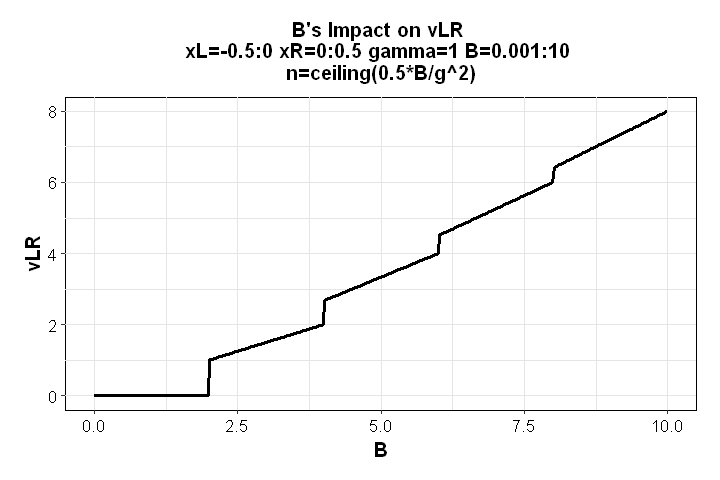

In [16]:
uplot3(Bmin = 0.001, Bmax = 10, xL=NULL, g=1, out="vLR", n=500) #Try xL=-0.5

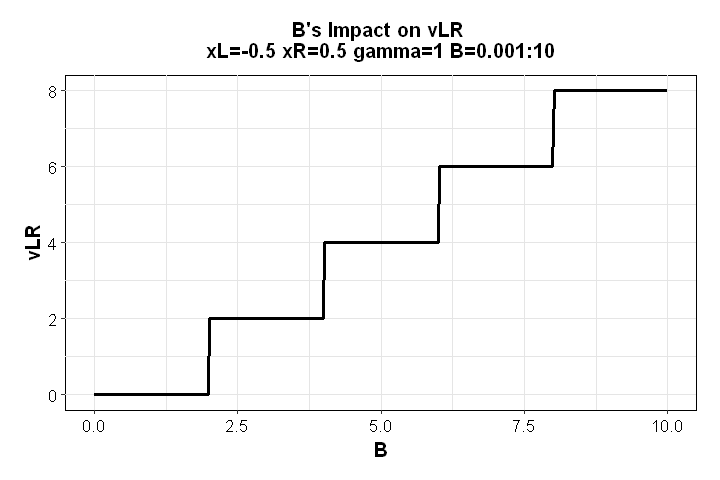

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
uplot3(Bmin = 0.001, Bmax = 10, xL=-0.5, g=1, out="vLR", n=500) #Try xL=-0.5

### Platform Divergence and B

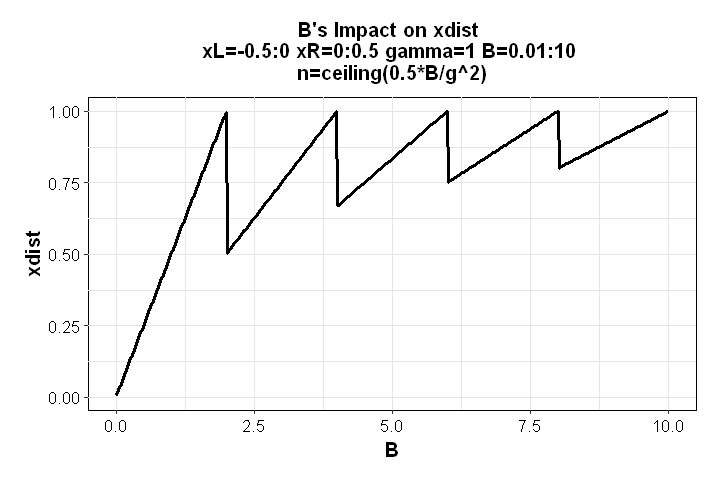

In [18]:
uplot3(Bmin = 0.01, Bmax = 10, g=1, out="xdist") # change g